In [55]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import train_test_split


total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv")
total_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [56]:
print(f"duplicated names: {total_data['name'].duplicated().sum()}")
print(f"duplicated host id's: {total_data['host_id'].duplicated().sum()}")
print(f"duplicated id's: {total_data['id'].duplicated().sum()}")

duplicated names: 989
duplicated host id's: 11438
duplicated id's: 0


In [57]:
#eliminating irrelavent information
total_data.drop(["id", "name", "host_name", "last_review", "reviews_per_month"], axis = 1, inplace = True)
total_data.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


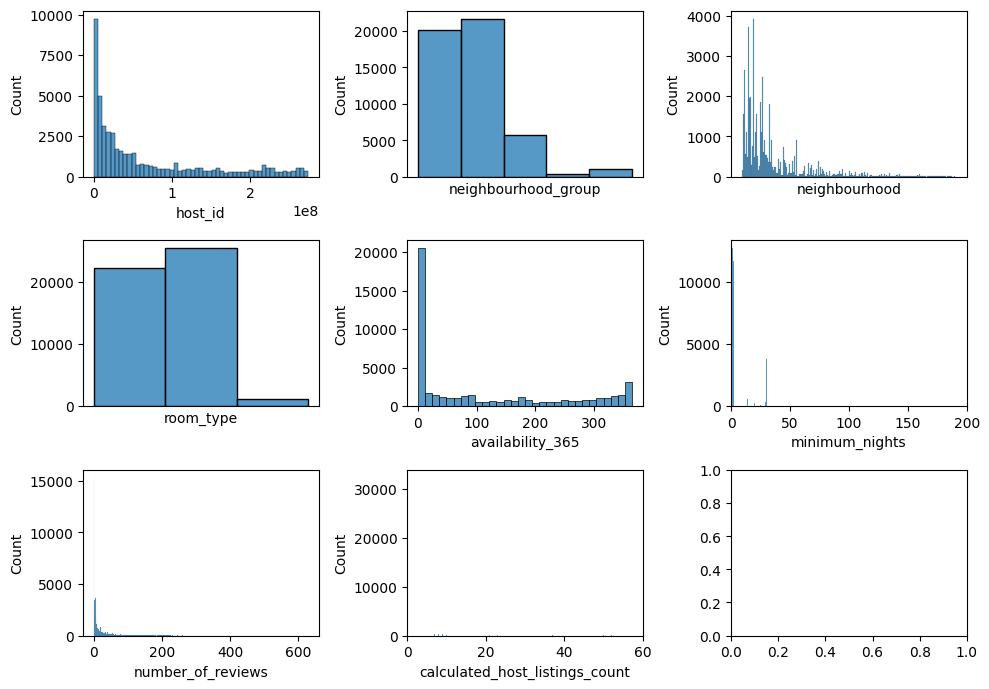

In [58]:
fig, axis = plt.subplots(3, 3, figsize=(10, 7))

sns.histplot(ax = axis[0,0], data = total_data, x = "host_id")
sns.histplot(ax = axis[0,1], data = total_data, x = "neighbourhood_group").set_xticks([])
sns.histplot(ax = axis[0,2], data = total_data, x = "neighbourhood").set_xticks([])
sns.histplot(ax = axis[1,0], data = total_data, x = "room_type").set_xticks([])
sns.histplot(ax = axis[1,1], data = total_data, x = "availability_365")
sns.histplot(ax = axis[1,2], data = total_data, x = "minimum_nights").set_xlim(0,200)
sns.histplot(ax = axis[2,0], data = total_data, x = "number_of_reviews")
sns.histplot(ax = axis[2,1], data = total_data, x = "calculated_host_listings_count").set_xlim(0,60)




plt.tight_layout()

plt.show()

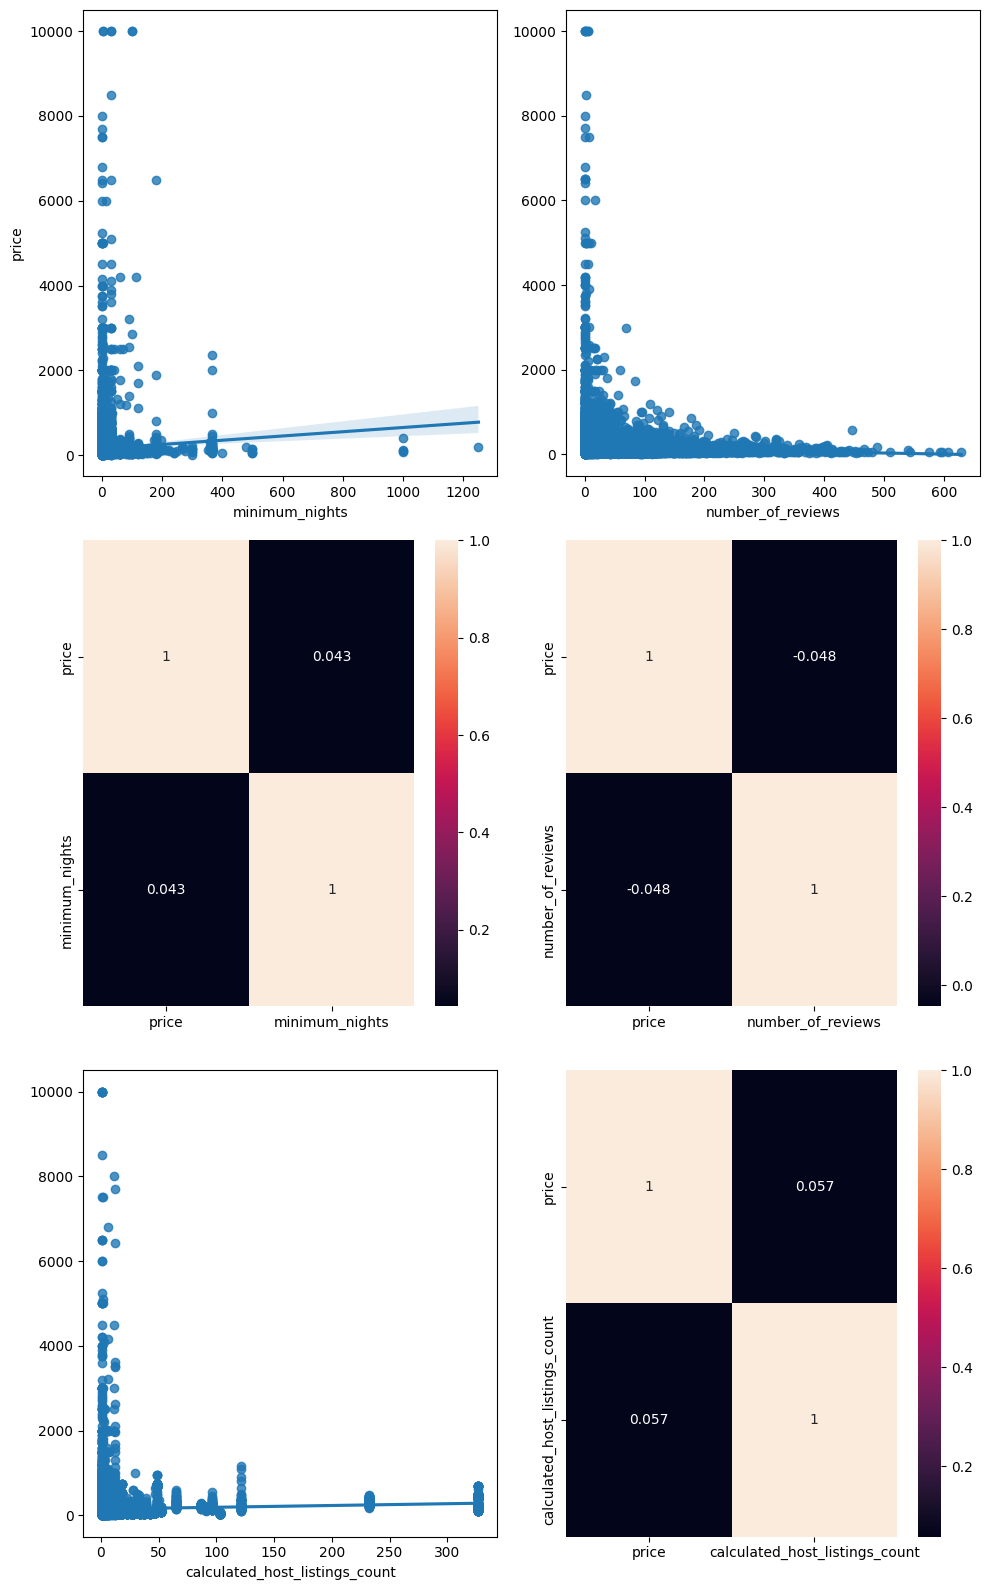

In [59]:
fig, axis = plt.subplots(3, 2, figsize = (10, 16))

sns.regplot(ax = axis[0, 0], data = total_data, x = "minimum_nights", y = "price")
sns.heatmap(total_data[["price", "minimum_nights"]].corr(), annot = True, ax = axis[1, 0])

sns.regplot(ax = axis[0, 1], data = total_data, x = "number_of_reviews", y = "price").set(ylabel = None)
sns.heatmap(total_data[["price", "number_of_reviews"]].corr(), annot = True, ax = axis[1, 1])

sns.regplot(ax = axis[2, 0], data = total_data, x = "calculated_host_listings_count", y = "price").set(ylabel = None)
sns.heatmap(total_data[["price", "calculated_host_listings_count"]].corr(), annot = True, ax = axis[2, 1]).set(ylabel = None)

plt.tight_layout()

plt.show()

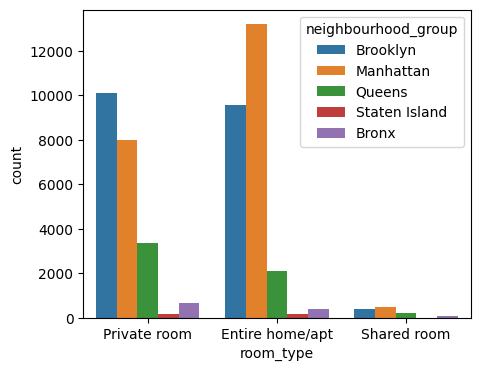

In [60]:
fig, axis = plt.subplots(figsize = (5, 4))

sns.countplot(data = total_data, x = "room_type", hue = "neighbourhood_group")

plt.show()


<Axes: >

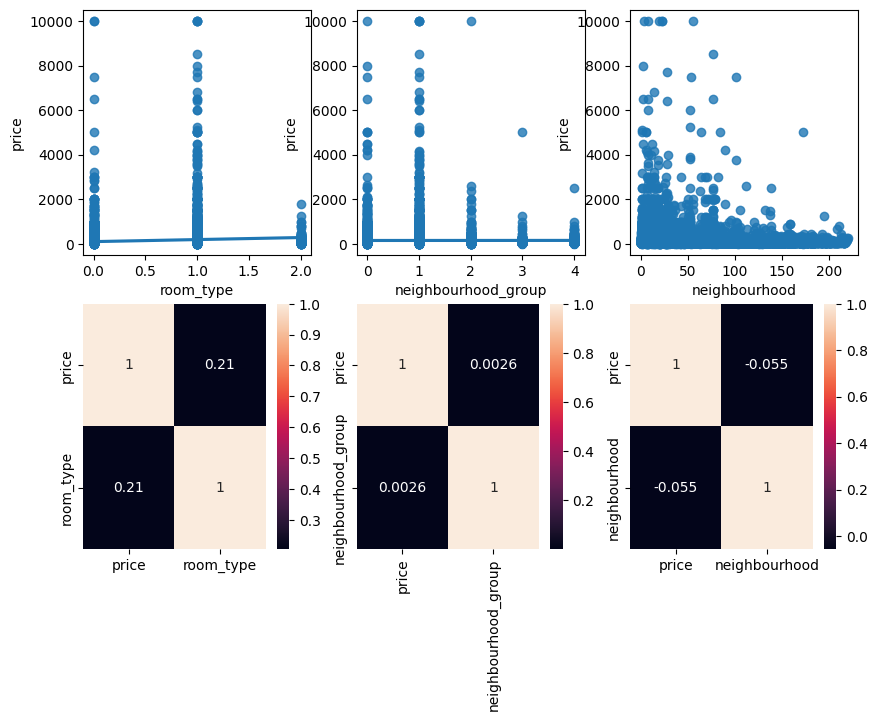

In [61]:
total_data["room_type"] = pd.factorize(total_data["room_type"])[0]
total_data["neighbourhood_group"] = pd.factorize(total_data["neighbourhood_group"])[0]
total_data["neighbourhood"] = pd.factorize(total_data["neighbourhood"])[0]

total_data = total_data[total_data["price"] > 0]

fig, axis = plt.subplots(2, 3, figsize=(10, 7))

sns.regplot(ax = axis[0, 0], data = total_data, x = "room_type", y = "price")
sns.heatmap(total_data[["price", "room_type"]].corr(), annot = True, ax = axis[1, 0])

sns.regplot(ax = axis[0, 1], data = total_data, x = "neighbourhood_group", y = "price")
sns.heatmap(total_data[["price", "neighbourhood_group"]].corr(), annot = True, ax = axis[1, 1])

sns.regplot(ax = axis[0, 2], data = total_data, x = "neighbourhood", y = "price")
sns.heatmap(total_data[["price", "neighbourhood"]].corr(), annot = True, ax = axis[1, 2])

In [62]:
#finding outliers in price
price_stats = total_data["price"].describe()
price_stats

count    48884.000000
mean       152.755053
std        240.170260
min         10.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [63]:
price_iqr = price_stats["75%"] - price_stats["25%"]
upper_limit = price_stats["75%"] + 1.5 * price_iqr
lower_limit = price_stats["25%"] - 1.5 * price_iqr

print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(price_iqr, 2)}")

The upper and lower limits for finding outliers are 334.0 and -90.0, with an interquartile range of 106.0


In [64]:
total_data = total_data[total_data["price"] > 0]
count_0 = total_data[total_data["price"] == 0].shape[0]
count_1 = total_data[total_data["price"] == 1].shape[0]

print("Count of 0: ", count_0)
print("Count of 1: ", count_1)

Count of 0:  0
Count of 1:  0


In [65]:
#finding outliers in minimum nights
nights_stats = total_data["minimum_nights"].describe()
nights_stats

count    48884.000000
mean         7.029887
std         20.512224
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

In [66]:
nights_iqr = nights_stats["75%"] - nights_stats["25%"]

upper_limit = nights_stats["75%"] + 1.5 * nights_iqr
lower_limit = nights_stats["25%"] - 1.5 * nights_iqr

print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(nights_iqr, 2)}")

The upper and lower limits for finding outliers are 11.0 and -5.0, with an interquartile range of 4.0


In [67]:
total_data = total_data[total_data["minimum_nights"] <= 15]
count_0 = total_data[total_data["minimum_nights"] == 0].shape[0]
count_1 = total_data[total_data["minimum_nights"] == 1].shape[0]
count_2 = total_data[total_data["minimum_nights"] == 2].shape[0]
count_3 = total_data[total_data["minimum_nights"] == 3].shape[0]
count_4 = total_data[total_data["minimum_nights"] == 4].shape[0]


print("Count of 0: ", count_0)
print("Count of 1: ", count_1)
print("Count of 2: ", count_2)
print("Count of 3: ", count_3)
print("Count of 4: ", count_4)

Count of 0:  0
Count of 1:  12717
Count of 2:  11693
Count of 3:  7998
Count of 4:  3302


In [68]:
#finding outliers in number of reviews
review_stats = total_data["number_of_reviews"].describe()
review_stats

count    43265.000000
mean        25.211950
std         46.292011
min          0.000000
25%          1.000000
50%          6.000000
75%         27.000000
max        629.000000
Name: number_of_reviews, dtype: float64

In [69]:
review_iqr = review_stats["75%"] - review_stats["25%"]

upper_limit = review_stats["75%"] + 1.5 * review_iqr
lower_limit = review_stats["25%"] - 1.5 * review_iqr

print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(review_iqr, 2)}")

The upper and lower limits for finding outliers are 66.0 and -38.0, with an interquartile range of 26.0


In [70]:
#finding outliers in calculated host listings
hostlist_stats = total_data["calculated_host_listings_count"].describe()
hostlist_stats

count    43265.000000
mean         3.369305
std         21.721688
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        327.000000
Name: calculated_host_listings_count, dtype: float64

In [71]:
hostlist_iqr = hostlist_stats["75%"] - hostlist_stats["25%"]

upper_limit = hostlist_stats["75%"] + 1.5 * hostlist_iqr
lower_limit = hostlist_stats["25%"] - 1.5 * hostlist_iqr

print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(hostlist_iqr, 2)}")

The upper and lower limits for finding outliers are 3.5 and -0.5, with an interquartile range of 1.0


In [72]:
count_0 = sum(1 for x in total_data["calculated_host_listings_count"] if x in range(0, 5))
count_1 = total_data[total_data["calculated_host_listings_count"] == 1].shape[0]
count_2 = total_data[total_data["calculated_host_listings_count"] == 2].shape[0]

print("Count of 0: ", count_0)
print("Count of 1: ", count_1)
print("Count of 2: ", count_2)

Count of 0:  40308
Count of 1:  30253
Count of 2:  6179


In [73]:
total_data = total_data[total_data["calculated_host_listings_count"] > 3]

In [74]:
#finding null values
total_data.isnull().sum().sort_values(ascending = False)

host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [75]:
num_variables = ["number_of_reviews", "minimum_nights", "calculated_host_listings_count", 
                 "availability_365", "neighbourhood_group", "room_type"]
scaler = MinMaxScaler()
scal_features = scaler.fit_transform(total_data[num_variables])
df_scal = pd.DataFrame(scal_features, index = total_data.index, columns = num_variables)
df_scal["price"] = total_data["price"]
df_scal.head()

,number_of_reviews,minimum_nights,calculated_host_listings_count,availability_365,neighbourhood_group,room_type,price
0,0.016575,0.000000,0.006192,1.000000,0.00,0.0,149
9,0.294659,0.000000,0.000000,0.515068,0.25,0.5,150
21,0.239411,0.071429,0.006192,0.950685,0.00,0.0,130
22,0.071823,0.000000,0.006192,0.997260,0.00,0.0,80
23,0.130755,0.071429,0.006192,0.832877,0.00,0.0,110


In [76]:
X = df_scal.drop("price", axis = 1)
y = df_scal["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


selection_model = SelectKBest(chi2, k = 4)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

,minimum_nights,calculated_host_listings_count,availability_365,room_type
0,0.071429,0.000000,0.841096,0.0
1,0.142857,0.006192,0.246575,0.0
2,0.000000,0.024768,0.000000,0.0
3,0.000000,0.000000,0.539726,0.5
4,0.000000,0.080495,0.887671,0.0


In [81]:
X_train_sel["price"] = list(y_train)
X_test_sel["price"] = list(y_test)
X_train_sel.to_csv("../clean_train.csv", index = False)
X_test_sel.to_csv("../clean_test.csv", index = False)